In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [2]:
#loading csv file
df = pd.read_csv("Datasets/Vaccination_Coverage_among_Young_Children__0-35_Months__20241101.csv")

#sorting by vaccine type (column is named 'Vaccine')
df_sorted = df.sort_values (by='Vaccine')

#Displaying the sorted DataFrame
df_sorted

#dropping columns
df = df.drop(columns=['Geography Type'])

df

#filtering DF again to keep only rows where Dimension Type = 'Age' 
df = df[df['Dimension Type'] == 'Age']
df

,Vaccine,Dose,Geography,Birth Year/Birth Cohort,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
0,DTaP,≥3 Doses,North Dakota,2019,Age,19 Months,93.5,88.0 to 96.6,263.0
1,DTaP,≥3 Doses,North Dakota,2018,Age,19 Months,95.2,91.0 to 97.5,293.0
2,DTaP,≥3 Doses,North Dakota,2018-2019,Age,19 Months,91.8,88.3 to 94.3,556.0
3,Polio,≥3 Doses,North Dakota,2021,Age,19 Months,89.4,81.9 to 94.1,143.0
4,Polio,≥2 Doses,North Dakota,2021,Age,5 Months,79.3,69.0 to 86.8,143.0
...,...,...,...,...,...,...,...,...,...
128183,Hep A,≥2 Doses,New Hampshire,2021,Age,24 Months,46.7,36.7 to 58.0,126.0
128184,DTaP,≥3 Doses,New Hampshire,2021,Age,19 Months,95.0,90.2 to 97.5,126.0
128185,Hep B,≥3 Doses,New Hampshire,2020-2021,Age,24 Months,95.5,92.5 to 97.5,315.0
128186,PCV,≥3 Doses,New Hampshire,2021,Age,7 Months,70.0,59.6 to 78.7,126.0


In [3]:
# Defining a dictionary to map each state to respective region
state_to_region = {
    # Northeast
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast', 
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 
    'PA-Philadelphia': 'Northeast', 'PA-Rest of state': 'Northeast',

    # Midwest
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest',
    'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest', 'Nebraska': 'Midwest',
    'North Dakota': 'Midwest', 'Ohio': 'Midwest', 'South Dakota': 'Midwest', 'Wisconsin': 'Midwest',

    # South
    'Alabama': 'South', 'Arkansas': 'South', 'Delaware': 'South', 'Florida': 'South',
    'Georgia': 'South', 'Kentucky': 'South', 'Louisiana': 'South', 'Maryland': 'South',
    'Mississippi': 'South', 'North Carolina': 'South', 'Oklahoma': 'South', 'South Carolina': 'South',
    'Tennessee': 'South', 'Texas': 'South', 'Virginia': 'South', 'West Virginia': 'South',

    # West
    'Alaska': 'West', 'Arizona': 'West', 'California': 'West', 'Colorado': 'West', 
    'Hawaii': 'West', 'Idaho': 'West', 'Montana': 'West', 'Nevada': 'West', 
    'New Mexico': 'West', 'Oregon': 'West', 'Utah': 'West', 'Washington': 'West', 'Wyoming': 'West'
}

# Mapping each state in the 'Geography' column to its region
df['Region'] = df['Geography'].map(state_to_region)

# Reordering columns so that 'Region' appears first
df = df[['Region'] + [col for col in df.columns if col != 'Region']]

# Display the updated DataFrame
df



,Region,Vaccine,Dose,Geography,Birth Year/Birth Cohort,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
0,Midwest,DTaP,≥3 Doses,North Dakota,2019,Age,19 Months,93.5,88.0 to 96.6,263.0
1,Midwest,DTaP,≥3 Doses,North Dakota,2018,Age,19 Months,95.2,91.0 to 97.5,293.0
2,Midwest,DTaP,≥3 Doses,North Dakota,2018-2019,Age,19 Months,91.8,88.3 to 94.3,556.0
3,Midwest,Polio,≥3 Doses,North Dakota,2021,Age,19 Months,89.4,81.9 to 94.1,143.0
4,Midwest,Polio,≥2 Doses,North Dakota,2021,Age,5 Months,79.3,69.0 to 86.8,143.0
...,...,...,...,...,...,...,...,...,...,...
128183,Northeast,Hep A,≥2 Doses,New Hampshire,2021,Age,24 Months,46.7,36.7 to 58.0,126.0
128184,Northeast,DTaP,≥3 Doses,New Hampshire,2021,Age,19 Months,95.0,90.2 to 97.5,126.0
128185,Northeast,Hep B,≥3 Doses,New Hampshire,2020-2021,Age,24 Months,95.5,92.5 to 97.5,315.0
128186,Northeast,PCV,≥3 Doses,New Hampshire,2021,Age,7 Months,70.0,59.6 to 78.7,126.0


In [ ]:
# Filter the DataFrame to only include rows where:
# - 'Vaccine' is 'DTaP'
# - 'Birth Cohort' is '2020-2021'
# - 'Dose' is '≥2 Doses'

df_filtered = df[(df['Vaccine'] == 'DTaP') & 
                 (df['Birth Year/Birth Cohort'] == '2020-2021') & 
                 (df['Dose'] == '≥4 Doses')]

# Display the filtered DataFrame
df_filtered




,Region,Vaccine,Dose,Geography,Birth Year/Birth Cohort,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size
51,Midwest,DTaP,≥4 Doses,North Dakota,2020-2021,Age,19 Months,68.8,61.8 to 75.1,391.0
981,South,DTaP,≥4 Doses,North Carolina,2020-2021,Age,35 Months,89.1,84.6 to 92.7,764.0
1968,NaN,DTaP,≥4 Doses,United States,2020-2021,Age,35 Months,87.0,85.7 to 88.2,28668.0
2478,NaN,DTaP,≥4 Doses,Region 5,2020-2021,Age,35 Months,88.4,85.9 to 90.6,3717.0
3248,Northeast,DTaP,≥4 Doses,New Jersey,2020-2021,Age,35 Months,88.1,81.8 to 93.1,436.0
...,...,...,...,...,...,...,...,...,...,...
125993,Midwest,DTaP,≥4 Doses,South Dakota,2020-2021,Age,19 Months,65.2,57.8 to 71.9,483.0
126429,NaN,DTaP,≥4 Doses,Region 3,2020-2021,Age,19 Months,72.2,69.6 to 74.6,3970.0
126556,Midwest,DTaP,≥4 Doses,Wisconsin,2020-2021,Age,24 Months,80.0,74.7 to 84.8,485.0
126577,Midwest,DTaP,≥4 Doses,Wisconsin,2020-2021,Age,19 Months,72.8,67.0 to 77.9,485.0


In [5]:

# Group the data by Region and calculate the mean for each group
grouped_data = df_filtered.groupby('Region')['Estimate (%)'].apply(list)

# Perform ANOVA test across the 4 regional groups
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation:
if p_value < 0.01:
    print("There is a significant difference in the mean percentages across regions.")
else:
    print("There is no significant difference in the mean percentages across regions.")


F-statistic: 4.422991145042774
P-value: 0.005178454891555709
There is a significant difference in the mean percentages across regions.


In [6]:
# for the birth cohort 2020-2021 across ages 0-35 months, but focused on 4 doses up to age 18 months,

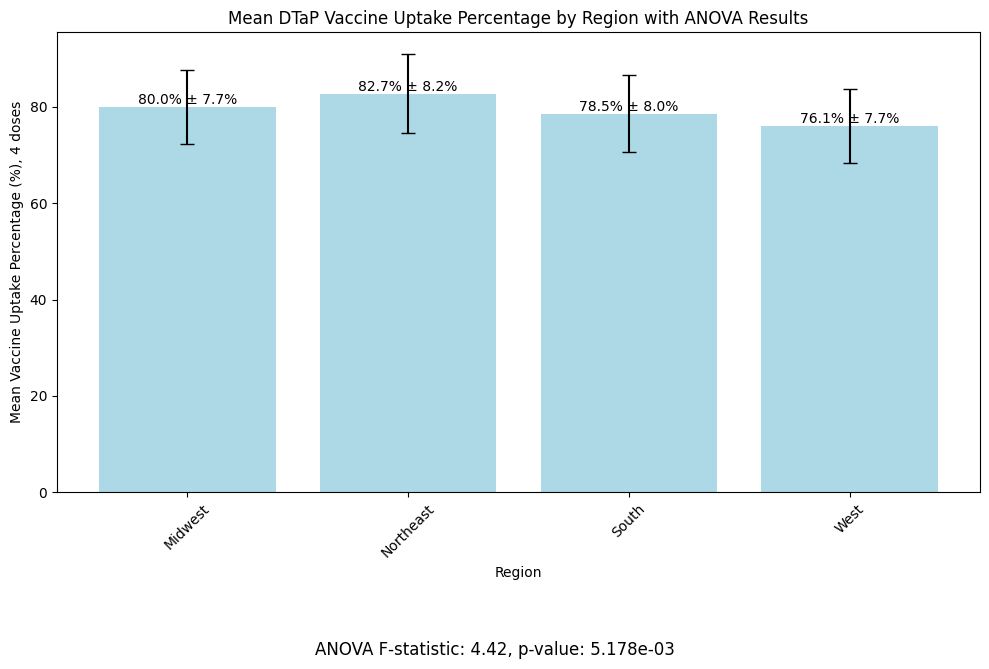

In [12]:
#visualization


# Group data by Region and calculate the mean and standard deviation of 'Percentage' for each region
region_stats = df_filtered.groupby('Region')['Estimate (%)'].agg(['mean', 'std']).reset_index()

# Visualizing ANOVA results with a bar plot and error bars
plt.figure(figsize=(10, 6))
bars = plt.bar(region_stats['Region'], region_stats['mean'], yerr=region_stats['std'], capsize=5, color='lightblue')
plt.title('Mean DTaP Vaccine Uptake Percentage by Region with ANOVA Results')
plt.xlabel('Region')
plt.ylabel('Mean Vaccine Uptake Percentage (%), 4 doses')
plt.xticks(rotation=45)

# Display ANOVA result in plot
f_statistic, p_value = stats.f_oneway(*df_filtered.groupby('Region')['Estimate (%)'].apply(list))
anova_text = f"ANOVA F-statistic: {f_statistic:.2f}, p-value: {p_value:.3e}"
plt.figtext(0.5, -0.1, anova_text, ha='center', fontsize=12)

#annotations on the plot
for bar, mean, std in zip(bars, region_stats['mean'], region_stats['std']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{mean:.1f}% ± {std:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
